## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Data understanding

In [3]:
#reading in the dataset
lead_score= pd.read_csv('Leads.csv')

In [4]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_score.shape

(9240, 37)

In [6]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data cleaning

In [7]:
#Checking for duplicate values
lead_score.duplicated().sum()

0

### Dealing with Missing values

In [8]:
#Dealing with Missing values
(lead_score.isnull().sum()/9240) *100   #checking missing values in percentages in all columns

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
#dropping column with over 40% missing values
lead_score_updated= lead_score.drop(labels=['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality'], axis=1)

In [10]:
#checking shape again
lead_score_updated.shape

(9240, 32)

In [11]:
(lead_score_updated.isnull().sum()/9240)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
#dealing with the Tags column
lead_score_updated.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [13]:
lead_score_updated.Tags.mode()

0    Will revert after reading the email
dtype: object

In [14]:
#Changing missing values percentages for each column into a dataframe
missing_df= pd.DataFrame((lead_score_updated.isnull().sum()/9240)*100)

#choosing columns with missing values between 0 and 15%
missing_df.columns= ['Missing']

missing_df

,Missing
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [15]:
missing_df[(missing_df['Missing']<15) & (missing_df['Missing']>0)]

,Missing
Lead Source,0.389610
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719


In [16]:
#We will be dropping the missing values from those columns that have missing values less than 15%
missing_df[(missing_df['Missing']<15) & (missing_df['Missing']>0)].index

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], dtype='object')

In [17]:
#dropping the missing rows from 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'
lead_score_updated= lead_score_updated[-lead_score_updated['Lead Source'].isnull()]
lead_score_updated= lead_score_updated[-lead_score_updated['TotalVisits'].isnull()]
lead_score_updated= lead_score_updated[-lead_score_updated['Page Views Per Visit'].isnull()]
lead_score_updated= lead_score_updated[-lead_score_updated['Last Activity'].isnull()]

#checking shape 
lead_score_updated.shape

(9074, 32)

In [18]:
#checking missing values again as percentages
(lead_score_updated.isnull().sum()/9074)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.303064
Specialization                                   15.770333
How did you hear about X Education               24.245096
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.0000

These columns have missing values between 15 and 40%. 
'Country','Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City'                                    

In [19]:
#dealing with missing values in Tags column. 
#Tags column has 36% missing values so it wouldn't be ideal to impute that many values with the mode or to drop them altogether
#So we are creating a new category called 'Missing' and assigning it to the missing values
lead_score_updated.Tags.value_counts()

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [20]:
#as explained above creating a new category called 'Missing' and assigning it to the missing values
lead_score_updated.Tags= lead_score_updated.Tags.fillna('Missing')
lead_score_updated.Tags.value_counts(normalize=True)

Missing                                              0.366652
Will revert after reading the email                  0.222173
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number n

In [21]:
#Dealing with missing values in the column 'Country'

lead_score_updated.Country.value_counts(normalize=True) 

#So we can see that Indians are predominantly people who are visiting the company's website and contributions from other countries are very miniscule
#So here we will impute the missing values with the mode i.e. 'India'

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Kuwait                  0.000590
South Africa            0.000590
Germany                 0.000590
Nigeria                 0.000590
Canada                  0.000590
Sweden                  0.000443
Philippines             0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
China                   0.000295
Uganda                  0.000295
Italy                   0.000295
Netherlands             0.000295
Belgium                 0.000295
Bangladesh              0.000295
Indonesia               0.000148
Denmark                 0.000148
Russia    

In [22]:
#So as explained above here we will impute the missing values with the mode i.e. 'India'
lead_score_updated.Country= lead_score_updated.Country.fillna('India')
lead_score_updated.Country.value_counts(normalize=True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Hong Kong               0.000771
Bahrain                 0.000771
France                  0.000661
Oman                    0.000661
unknown                 0.000551
Kuwait                  0.000441
South Africa            0.000441
Germany                 0.000441
Nigeria                 0.000441
Canada                  0.000441
Sweden                  0.000331
Philippines             0.000220
Ghana                   0.000220
Asia/Pacific Region     0.000220
China                   0.000220
Uganda                  0.000220
Italy                   0.000220
Netherlands             0.000220
Belgium                 0.000220
Bangladesh              0.000220
Indonesia               0.000110
Denmark                 0.000110
Russia    

In [23]:
lead_score_updated['Specialization'].value_counts(normalize=True)

#We know 'Select' is the same as a null value here. So replacing it with the category 'Missing'
lead_score_updated.Specialization.replace(to_replace='Select', value='Missing', inplace=True)


#filling null values with 'Missing' as well
lead_score_updated['Specialization']= lead_score_updated['Specialization'].fillna('Missing')

lead_score_updated.Specialization.value_counts(normalize=True)

Missing                              0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

**Employing the same strategy to 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City'**

In [24]:
#column 'How did you hear about X Education'
lead_score_updated['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.710794
Online Search            0.117544
Word Of Mouth            0.050480
Student of SomeSchool    0.045097
Other                    0.027058
Multiple Sources         0.022112
Advertisements           0.010183
Social Media             0.009601
Email                    0.003782
SMS                      0.003346
Name: How did you hear about X Education, dtype: float64

In [25]:
#Assigning values with 'Select' as 'Missing'
lead_score_updated['How did you hear about X Education'].replace(to_replace='Select', value='Missing', inplace=True)

#filling NA values with 'Missing'
lead_score_updated['How did you hear about X Education']= lead_score_updated['How did you hear about X Education'].fillna('Missing')

lead_score_updated['How did you hear about X Education'].value_counts(normalize=True)

Missing                  0.780912
Online Search            0.089046
Word Of Mouth            0.038241
Student of SomeSchool    0.034164
Other                    0.020498
Multiple Sources         0.016751
Advertisements           0.007714
Social Media             0.007274
Email                    0.002865
SMS                      0.002535
Name: How did you hear about X Education, dtype: float64

In [26]:
#As around 78% of the values in column 'How did you hear about X Education' is turning out to be missing so its better to just drop this column altogether.

#Dropping column
lead_score_updated.drop('How did you hear about X Education', axis=1, inplace=True)

#checking shape after dropping column
lead_score_updated.shape

(9074, 31)

In [27]:
#Column 'What is your current occupation'
lead_score_updated['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: What is your current occupation, dtype: float64

In [28]:
#Assigning the missing values as 'Missing'
lead_score_updated['What is your current occupation'].fillna('Missing', inplace=True)

#checking the vategories after missing value action
lead_score_updated['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.603482
Missing                 0.295680
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

In [29]:
#Column 'What matters most to you in choosing a course'

lead_score_updated['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999686
Other                        0.000157
Flexibility & Convenience    0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [30]:
#Filling Null values with category 'Missing'
lead_score_updated['What matters most to you in choosing a course'].fillna('Missing', inplace=True)

lead_score_updated['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.702006
Missing                      0.297774
Other                        0.000110
Flexibility & Convenience    0.000110
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
#Column 'Lead Profile'
lead_score_updated['Lead Profile'].value_counts(normalize=True)

Select                         0.636378
Potential Lead                 0.243879
Other Leads                    0.075643
Student of SomeSchool          0.037665
Lateral Student                0.003296
Dual Specialization Student    0.003139
Name: Lead Profile, dtype: float64

In [32]:
#Replacing 'Select' with 'Missing' as we discussed earlier
lead_score_updated['Lead Profile'].replace(to_replace='Select', value='Missing', inplace=True)

#Assigning the null values as 'Missing' as well
lead_score_updated['Lead Profile'].fillna('Missing', inplace=True)

lead_score_updated['Lead Profile'].value_counts(normalize=True)

Missing                        0.744655
Potential Lead                 0.171259
Other Leads                    0.053119
Student of SomeSchool          0.026449
Lateral Student                0.002314
Dual Specialization Student    0.002204
Name: Lead Profile, dtype: float64

In [33]:
#As there are about 74 percent missing values in this column so we should drop this variable altogether
lead_score_updated.drop('Lead Profile', axis=1, inplace=True)

#checking shape after dropping variable
lead_score_updated.shape

(9074, 30)

In [34]:
#Column 'City'
lead_score_updated.City.value_counts(normalize=True)

Mumbai                         0.415023
Select                         0.281646
Thane & Outskirts              0.097322
Other Cities                   0.088831
Other Cities of Maharashtra    0.058263
Other Metro Cities             0.049249
Tier II Cities                 0.009667
Name: City, dtype: float64

In [35]:
#Replacing 'Select' with 'Missing' as we discussed earlier
lead_score_updated.City.replace(to_replace='Select', value='Missing', inplace=True)

#Assigning the null values as 'Missing' as well
lead_score_updated.City.fillna('Missing', inplace=True)

lead_score_updated.City.value_counts(normalize=True)

Missing                        0.393983
Mumbai                         0.350121
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [36]:
#Checking missing values now again the dataset
lead_score_updated.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

**So our data is now clean**

In [37]:
#We don't need the column Prospect ID for our EDA and model building. So we can safely remove it from our dataset

#lead_score_updated.drop('Prospect ID', axis=1, inplace=True)

In [38]:
#shape of data after cleaning
lead_score_updated.shape

(9074, 30)

### Percentage of rows left after data cleaning process


In [39]:
#Percentage of rows left after data cleaning process
(lead_score_updated.shape[0]/lead_score.shape[0])*100

98.2034632034632

Percentage of rows left after data cleaning process is 98 percent.

So we still have a lot of the data retained for EDA and model building

## EDA

In [40]:
lead_score_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

### Categorical variables

In [42]:
#Categorical variables

Categorical= list(set(lead_score_updated.columns)- set(lead_score_updated.describe().columns))
Categorical

['What matters most to you in choosing a course',
 'Update me on Supply Chain Content',
 'Newspaper',
 'A free copy of Mastering The Interview',
 'X Education Forums',
 'Lead Origin',
 'Country',
 'Search',
 'Digital Advertisement',
 'Get updates on DM Content',
 'Specialization',
 'Do Not Call',
 'Lead Source',
 'Through Recommendations',
 'What is your current occupation',
 'Last Notable Activity',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Tags',
 'Do Not Email',
 'I agree to pay the amount through cheque',
 'City',
 'Newspaper Article',
 'Last Activity',
 'Prospect ID']

In [46]:
#We don't need Prospect ID in the Categorical variables so let's drop it
Categorical.remove('Prospect ID')

In [43]:
lead_score_updated.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [47]:
len(Categorical)

24

In [50]:
lead_score_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [51]:
#this function will plot barplots for every categorical variable
def barplotter(dataset, column):
    dataset[column].value_counts(normalize=True).plot.barh()
    plt.title(label='Plotting barplot for column: '+column)
    plt.xticks(rotation=90)
    plt.show()

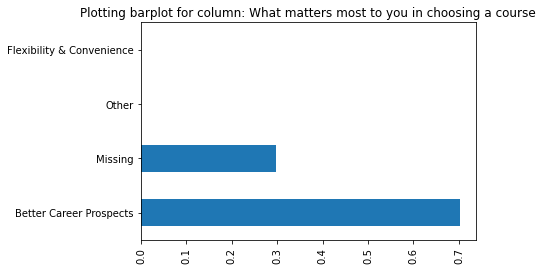

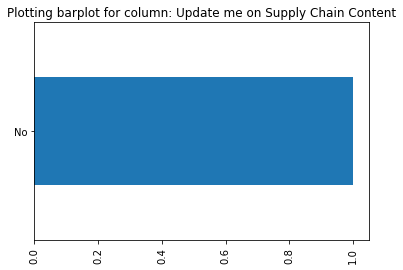

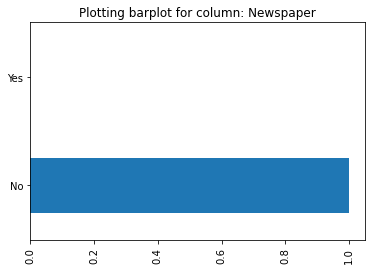

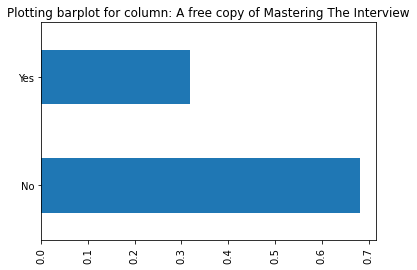

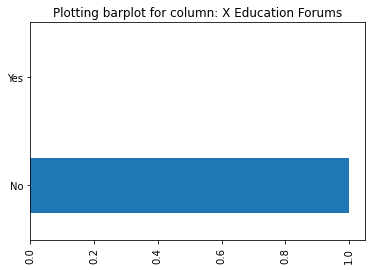

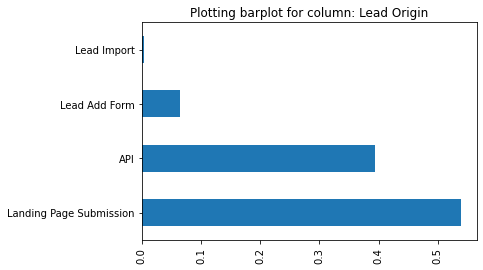

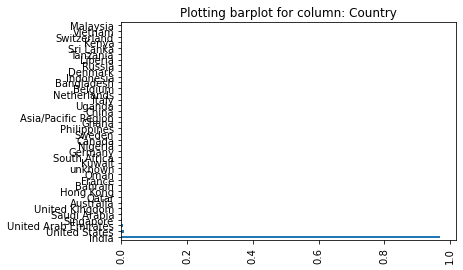

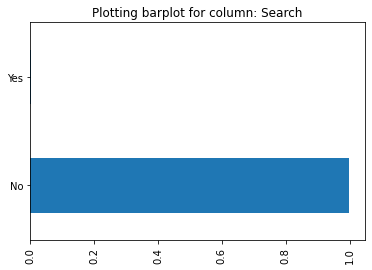

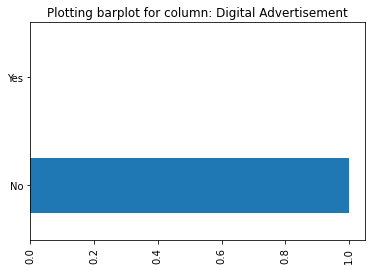

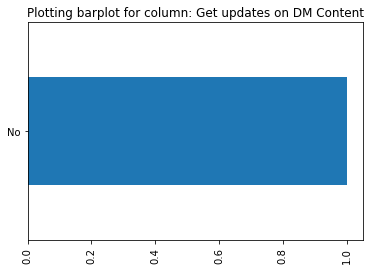

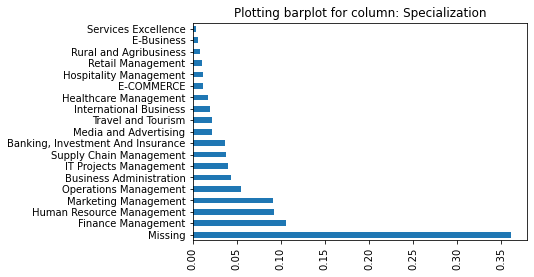

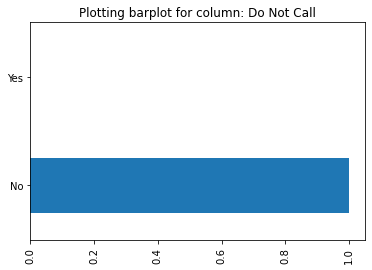

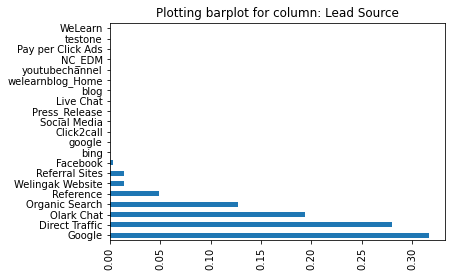

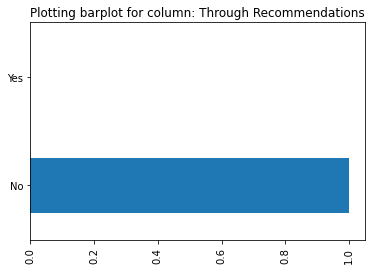

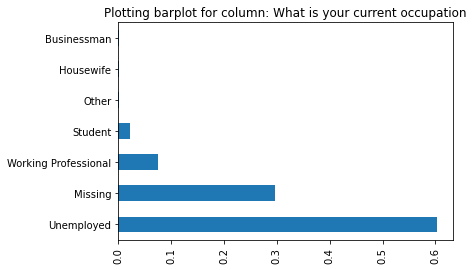

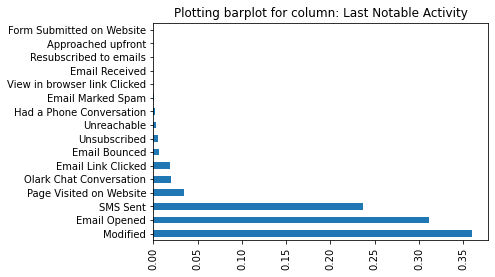

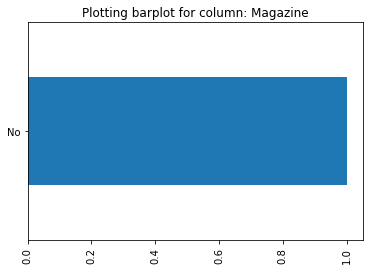

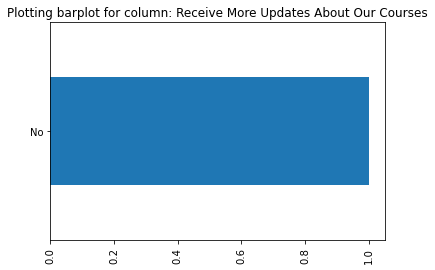

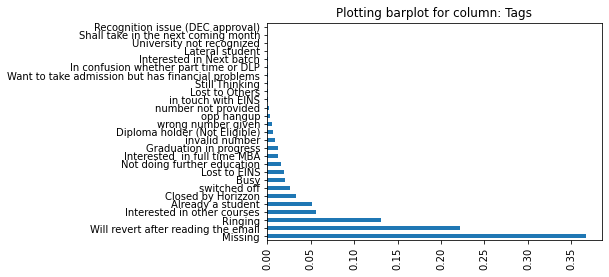

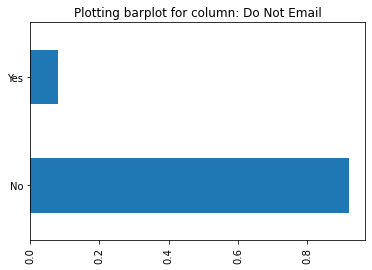

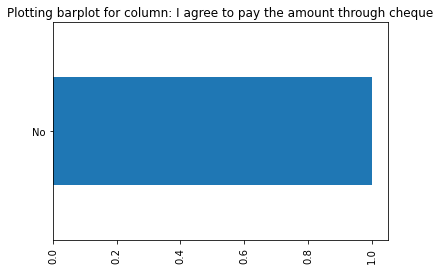

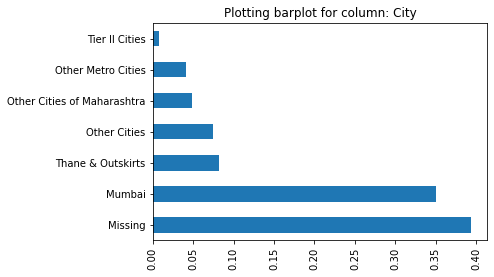

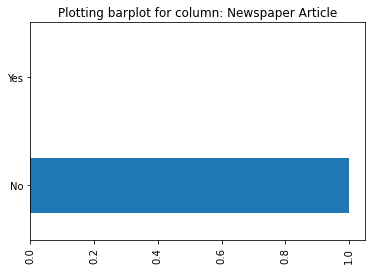

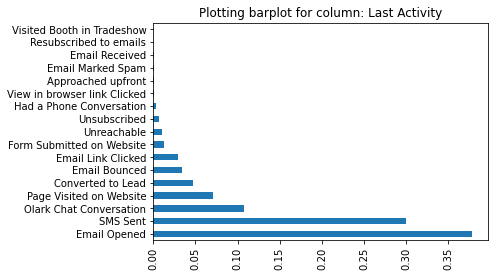

In [52]:
for i in Categorical:
    barplotter(lead_score_updated, i)

**Notable insights:**
1. Google and Direct Traffic are the biggest lead sources
2. Overwehlming majority of the leads are Indians
3. More leads have prior experience in Finance, HR and Marketing management
4. A good chunk of the leads are having current status of 'Will revert after reading the Email' or 'Ringing'
5. Majority of the leads are looking for a course for better career prospects.
6. Majority of the leads wants a free copy of 'Mastering the Interveiew'
7. Majority of the leads are currently unemployed
8. The last notable activities of students/leads are 'Modified', 'Email opened' and 'SMS sent'

### Numerical variables

In [53]:
#Numeric variables
numeric_variables= list(lead_score_updated.describe().columns)
numeric_variables

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

**Outlier handling**

In [54]:
#this function will plot boxplots for every numeric variable
def boxplotter(dataset, column):
    sns.boxplot(x=column, data= dataset)
    plt.title('Plotting boxplot for column: '+column)
    plt.show()

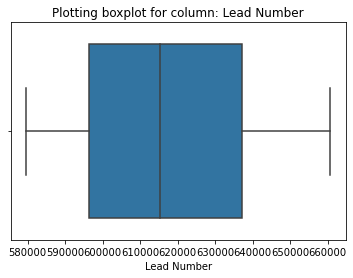

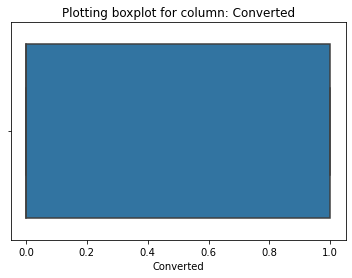

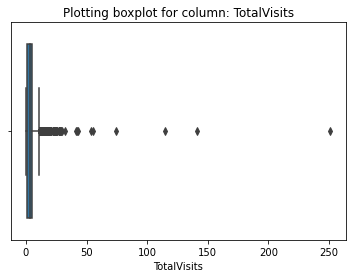

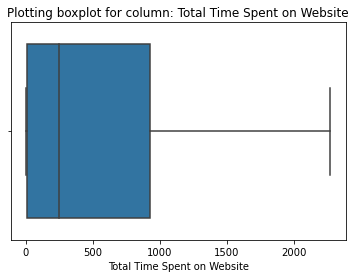

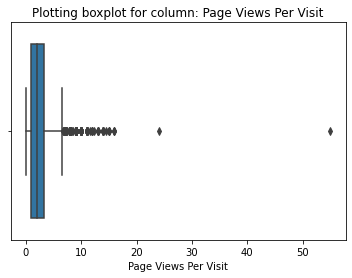

In [55]:
for i in numeric_variables:
    boxplotter(lead_score_updated, i)
    

In [ ]:
#Capping the outliers in column TotalVisits to 125 as we don't want two or three datapoints to skew our analysis
lead_score_updated= lead_score_updated[lead_score_updated.TotalVisits<=125]
lead_score_updated.shape

In [ ]:
#Capping the outliers in column 'Page Views Per Visit' to 25 as we don't want two or three datapoints to skew our analysis
lead_score_updated= lead_score_updated[lead_score_updated['Page Views Per Visit']<=25]

In [ ]:
lead_score_updated.shape

In [ ]:
lead_score_updated.head()

## Preparing the data for modelling

In [56]:
#Creating dummy variables for all Categorical variables
lead_score_updated =pd.get_dummies(data= lead_score_updated, columns=Categorical)

In [57]:
lead_score_updated.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doin

In [58]:
#shape
lead_score_updated.shape

(9074, 189)

**Train-Test split**

In [60]:
#We don't need lead Number for our model building as it's just a unique number assigned to each lead. So we are dropping it
X= lead_score_updated.drop(['Converted', 'Lead Number'], axis=1) #X will be our predictor variables
X.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Ta

In [61]:
X.shape

(9074, 187)

In [62]:
y= lead_score_updated['Converted']   #y is our target variable i.e. Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
y.shape

(9074,)

In [69]:
#Train-test split
#We are retaining the prospect ID in the train test split inorder to identify the leads later after making the predictions
#We won't be including Prospect ID as a predictor while building the model however
from sklearn.model_selection import train_test_split

xtrain0, xtest0, ytrain, ytest= train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)
xtrain0.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Ta

In [70]:
xtest.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Ta

In [71]:
#shape
xtrain0.shape

(6805, 187)

In [72]:
ytrain.shape

(6805,)

In [74]:
xtest0.shape

(2269, 187)

In [75]:
ytest.shape

(2269,)

**Removing Prospect ID from training and test set now as we will be building the model next**

In [79]:
#removing Prospect ID from training set and keeping it in a new variable xtrain so as not to lose the prospect ID from xtrain0
xtrain= xtrain0.drop('Prospect ID', axis=1)
xtrain.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recogniti

In [80]:
xtrain.shape

(6805, 186)

In [82]:
#removing Prospect ID from test set and keeping it in a new variable xtest so as not to lose the prospect ID from xtest0
xtest= xtest0.drop('Prospect ID', axis=1)
xtest.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recogniti

In [83]:
xtest.shape

(2269, 186)

In [84]:
#Scaling the variables using Standardisation

#importing standard Scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [85]:
#Scaling

xtrain[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(xtrain[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
xtrain.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recogniti

**Now our data is ready for model building**

## Model Buidling

**Feature selection using RFE**

In [97]:
import statsmodels.api as sm

In [92]:
from sklearn.linear_model import LogisticRegression
log1= LogisticRegression()

In [93]:
from sklearn.feature_selection import RFE
rfe= RFE(log1, 30)                                #selecting top 30 predictors using RFE
rfe= rfe.fit(xtrain, ytrain)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [94]:
list(zip(xtrain.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 76),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 113),
 ('What matters most to you in choosing a course_Better Career Prospects',
  True,
  1),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  154),
 ('What matters most to you in choosing a course_Missing', True, 1),
 ('What matters most to you in choosing a course_Other', False, 143),
 ('Update me on Supply Chain Content_No', False, 73),
 ('Newspaper_No', False, 111),
 ('Newspaper_Yes', False, 106),
 ('A free copy of Mastering The Interview_No', False, 150),
 ('A free copy of Mastering The Interview_Yes', False, 60),
 ('X Education Forums_No', False, 104),
 ('X Education Forums_Yes', False, 112),
 ('Lead Origin_API', False, 67),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 95),
 ('Country_Asia/Pacific Region', False, 115),
 ('Country_Australia', False, 55),


In [95]:
#top 30 fetures as selected by RFE
col= xtrain.columns[rfe.support_]
col

Index(['Total Time Spent on Website',
       'What matters most to you in choosing a course_Better Career Prospects',
       'What matters most to you in choosing a course_Missing',
       'Lead Origin_Lead Add Form', 'Country_Germany',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unsubscribed', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Missing',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Do Not Ema

In [98]:
#fitting model with rfe selected features

xtrain_sm= sm.add_constant(xtrain[col])
log_rfe= sm.GLM(ytrain, xtrain_sm, family=sm.families.Binomial())
log_rfe= log_rfe.fit()
log_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6774
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.4
Date:                Sun, 17 Apr 2022   Deviance:                       2168.9
Time:                        08:11:49   Pearson chi2:                 1.14e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -25.2513   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Total Time Spent on Website                                               1.1267      0.066     17.066      0.000       0.997       1.256
What matters most to you in choosing a course_Better Career Prospects    21.6177   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
What matters most to you in choosing a course_Missing                    18.9293   2.16e+05   8.76e-05      1.000   -4.23e+05    4.23e+05
Lead Origin_Lead Add Form                                                 1.0841      0.420      2.579      0.010       0.260       1.908
Country_Germany                                                           3.8556      1.284      3.004      0.003       1.340       6.371
Specialization_Travel and Tourism                                        -1.3145      0.455     -2.892      0.004      -2.205      -0.424
Lead Source_Olark Chat                                                    1.1653      0.164      7.101      0.000       0.844       1.487
Lead Source_Welingak Website                                              2.7387      0.847      3.235      0.001       1.079       4.398
Last Notable Activity_Modified                                           -1.6085      0.135    -11.910      0.000      -1.873      -1.344
Last Notable Activity_Olark Chat Conversation                            -2.0251      0.467     -4.336      0.000      -2.941      -1.110
Last Notable Activity_Unsubscribed                                        2.1173      0.855      2.476      0.013       0.441       3.793
Tags_Already a student                                                   -2.9688      0.808     -3.675      0.000      -4.552      -1.386
Tags_Busy                                                                 0.9657      0.424      2.279      0.023       0.135       1.796
Tags_Closed by Horizzon                                                   7.6949      0.819      9.398      0.000       6.090       9.300
Tags_Diploma holder (Not Eligible)                                       -2.2072      1.114     -1.981      0.048      -4.391      -0.024
Tags_Interested  in full time MBA                                        -1.3739      0.829     -1.658      0.097      -2.998       0.251
Tags_Interested in other courses                                         -1.0029      0.480     -2.089      0.037      -1.944      -0.062
Tags_Lateral student                                                     26.6296   1.22e+05      0.000      1.000   -2.39e+05    2.39e+05
Tags_Lost to EINS                              

**Checking VIFs**

In [99]:
#checking VIFs of RFE selected features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif= pd.DataFrame()
vif['Features']= xtrain[col].columns
vif['VIF']= [variance_inflation_factor(xtrain[col].values, i) for i in range(xtrain[col].shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,What matters most to you in choosing a course_...,53.09
2,What matters most to you in choosing a course_...,27.71
19,Tags_Missing,26.57
22,Tags_Will revert after reading the email,14.54
28,Do Not Email_No,14.43
21,Tags_Ringing,8.68
16,Tags_Interested in other courses,4.31
11,Tags_Already a student,3.86
13,Tags_Closed by Horizzon,3.15
26,Tags_switched off,2.50


The following features have high P values so we will remove them first and fit the model again:

'What matters most to you in choosing a course_Better Career Prospects',
'What matters most to you in choosing a course_Missing',
'Tags_Interested in full time MBA',
'Tags_Lateral student',
'Tags_Not doing further education',
'Tags_invalid number',
'Tags_number not provided',
'Tags_opp hangup',
'Tags_wrong number given'

In [104]:
#dropping columns with high pvalues
xtrain2= xtrain[col].drop(['What matters most to you in choosing a course_Better Career Prospects',
'What matters most to you in choosing a course_Missing',
'Tags_Interested  in full time MBA',
'Tags_Lateral student',
'Tags_Not doing further education',
'Tags_invalid number',
'Tags_number not provided',
'Tags_opp hangup',
'Tags_wrong number given'], axis= 1)
xtrain2.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Country_Germany,Specialization_Travel and Tourism,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in other courses,Tags_Lost to EINS,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Do Not Email_No,Last Activity_SMS Sent
5885,-0.887663,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8505,2.265199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
894,-0.821711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6437,-0.887663,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2988,1.369354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [105]:
len(xtrain2.columns)

21

In [107]:
#refitting the model
xtrain2_sm= sm.add_constant(xtrain2)
log2= sm.GLM(ytrain, xtrain2_sm, family=sm.families.Binomial())
log2= log2.fit().summary()
log2

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6783
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.5
Date:                Sun, 17 Apr 2022   Deviance:                       2535.0
Time:                        08:23:09   Pearson chi2:                 9.40e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.6107      0.366    -12.588      0.000      -5.329      -3.893
Total Time Spent on Website                       1.1161      0.061     18.295      0.000       0.997       1.236
Lead Origin_Lead Add Form                         1.7056      0.441      3.868      0.000       0.841       2.570
Country_Germany                                   3.4069      1.254      2.717      0.007       0.949       5.865
Specialization_Travel and Tourism                -1.2926      0.444     -2.912      0.004      -2.163      -0.423
Lead Source_Olark Chat                            1.4453      0.147      9.832      0.000       1.157       1.733
Lead Source_Welingak Website                      4.0867      0.853      4.793      0.000       2.416       5.758
Last Notable Activity_Modified                   -1.7942      0.126    -14.225      0.000      -2.041      -1.547
Last Notable Activity_Olark Chat Conversation    -1.8404      0.433     -4.248      0.000      -2.690      -0.991
Last Notable Activity_Unsubscribed                1.3116      0.818      1.603      0.109      -0.292       2.915
Tags_Already a student                           -1.7918      0.768     -2.334      0.020      -3.296      -0.287
Tags_Busy                                         2.2745      0.332      6.853      0.000       1.624       2.925
Tags_Closed by Horizzon                           8.7996      0.776     11.340      0.000       7.279      10.320
Tags_Diploma holder (Not Eligible)               -1.0101      1.084     -0.932      0.351      -3.134       1.114
Tags_Interested in other courses                  0.2360      0.407      0.580      0.562      -0.561       1.033
Tags_Lost to EINS                                 7.6182      0.659     11.560      0.000       6.327       8.910
Tags_Missing                                      1.8040      0.257      7.023      0.000       1.300       2.307
Tags_Ringing                                     -1.8597      0.340     -5.470      0.000      -2.526      -1.193
Tags_Will revert after reading the email          6.6611      0.312     21.354      0.000       6.050       7.273
Tags_switched off                                -1.8192      0.600     -3.031      0.002      -2.996      -0.643
Do Not Email_No                                   1.1550      0.270      4.277      0.000       0.626       1.684
Last Activity_SMS Sent                            2.0748      0.117     17.696      0.000       1.845       2.305
=================================================================================================================
"""

In [109]:
#Checking the Vifs again
vif= pd.DataFrame()
vif['Features']= xtrain2.columns
vif['VIF']= [variance_inflation_factor(xtrain2.values, i) for i in range(xtrain2.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
19,Do Not Email_No,8.36
15,Tags_Missing,4.03
17,Tags_Will revert after reading the email,3.39
16,Tags_Ringing,2.08
1,Lead Origin_Lead Add Form,1.85
6,Last Notable Activity_Modified,1.72
20,Last Activity_SMS Sent,1.69
4,Lead Source_Olark Chat,1.66
13,Tags_Interested in other courses,1.56
11,Tags_Closed by Horizzon,1.50


**These following variables still have high Pvalues so we need to remove them:**

'Last Notable Activity_Unsubscribed',
'Tags_Diploma holder (Not Eligible)',
'Tags_Interested in other courses',



In [116]:
xtrain3= xtrain2.drop(['Last Notable Activity_Unsubscribed',
'Tags_Diploma holder (Not Eligible)',
'Tags_Interested in other courses'], axis=1)
xtrain3.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Country_Germany,Specialization_Travel and Tourism,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Do Not Email_No,Last Activity_SMS Sent
5885,-0.887663,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
8505,2.265199,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
894,-0.821711,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6437,-0.887663,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2988,1.369354,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [117]:
xtrain3.shape

(6805, 18)

In [118]:
#refitting the model again 
xtrain3_sm= sm.add_constant(xtrain3)
log3= sm.GLM(ytrain, xtrain3_sm, family=sm.families.Binomial())
log3=log3.fit()
log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6786
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1269.5
Date:                Sun, 17 Apr 2022   Deviance:                       2539.0
Time:                        08:34:32   Pearson chi2:                 9.22e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.4780      0.319    -14.056      0.000      -5.102      -3.854
Total Time Spent on Website                       1.1140      0.061     18.314      0.000       0.995       1.233
Lead Origin_Lead Add Form                         1.6934      0.441      3.840      0.000       0.829       2.558
Country_Germany                                   3.3762      1.251      2.699      0.007       0.924       5.828
Specialization_Travel and Tourism                -1.2464      0.439     -2.837      0.005      -2.107      -0.385
Lead Source_Olark Chat                            1.4443      0.147      9.842      0.000       1.157       1.732
Lead Source_Welingak Website                      4.0767      0.852      4.784      0.000       2.406       5.747
Last Notable Activity_Modified                   -1.7970      0.126    -14.309      0.000      -2.043      -1.551
Last Notable Activity_Olark Chat Conversation    -1.8474      0.433     -4.268      0.000      -2.696      -0.999
Tags_Already a student                           -1.8254      0.751     -2.431      0.015      -3.297      -0.354
Tags_Busy                                         2.2427      0.295      7.610      0.000       1.665       2.820
Tags_Closed by Horizzon                           8.7671      0.760     11.538      0.000       7.278      10.256
Tags_Lost to EINS                                 7.5813      0.639     11.866      0.000       6.329       8.834
Tags_Missing                                      1.7732      0.204      8.696      0.000       1.374       2.173
Tags_Ringing                                     -1.8847      0.305     -6.189      0.000      -2.482      -1.288
Tags_Will revert after reading the email          6.6337      0.269     24.661      0.000       6.106       7.161
Tags_switched off                                -1.8526      0.580     -3.193      0.001      -2.990      -0.715
Do Not Email_No                                   1.0585      0.253      4.183      0.000       0.563       1.554
Last Activity_SMS Sent                            2.0631      0.116     17.713      0.000       1.835       2.291
=================================================================================================================
"""

**Now all the predictors have pvalues less than 0.05 so all are significant**

In [119]:
#Checking the VIFs again
vif= pd.DataFrame()
vif['Features']= xtrain3.columns
vif['VIF']= [variance_inflation_factor(xtrain3.values, i) for i in range(xtrain3.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
16,Do Not Email_No,5.92
12,Tags_Missing,2.91
14,Tags_Will revert after reading the email,2.71
1,Lead Origin_Lead Add Form,1.85
13,Tags_Ringing,1.71
17,Last Activity_SMS Sent,1.69
4,Lead Source_Olark Chat,1.65
6,Last Notable Activity_Modified,1.62
0,Total Time Spent on Website,1.45
10,Tags_Closed by Horizzon,1.37


**Final Model**

In [121]:
#As we can see 'Do Not Email_No' has a vif higher than 5 so we will be removing it and refit the model again

xtrain4= xtrain3.drop(['Do Not Email_No'], axis=1)
xtrain4.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Country_Germany,Specialization_Travel and Tourism,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Activity_SMS Sent
5885,-0.887663,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
8505,2.265199,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
894,-0.821711,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6437,-0.887663,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2988,1.369354,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [122]:
#shape
xtrain4.shape

(6805, 17)

In [123]:
#refitting the model again 
xtrain4_sm= sm.add_constant(xtrain4)
log4= sm.GLM(ytrain, xtrain4_sm, family=sm.families.Binomial())
log4=log4.fit()
log4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6787
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.6
Date:                Sun, 17 Apr 2022   Deviance:                       2559.2
Time:                        08:43:16   Pearson chi2:                 8.41e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5061      0.207    -16.934      0.000      -3.912      -3.100
Total Time Spent on Website                       1.1198      0.060     18.524      0.000       1.001       1.238
Lead Origin_Lead Add Form                         1.6626      0.443      3.754      0.000       0.795       2.531
Country_Germany                                   3.1190      1.255      2.485      0.013       0.659       5.580
Specialization_Travel and Tourism                -1.2906      0.436     -2.960      0.003      -2.145      -0.436
Lead Source_Olark Chat                            1.4748      0.146     10.087      0.000       1.188       1.761
Lead Source_Welingak Website                      4.0371      0.854      4.729      0.000       2.364       5.710
Last Notable Activity_Modified                   -1.8384      0.125    -14.716      0.000      -2.083      -1.594
Last Notable Activity_Olark Chat Conversation    -1.8730      0.432     -4.336      0.000      -2.720      -1.026
Tags_Already a student                           -1.7718      0.750     -2.361      0.018      -3.242      -0.301
Tags_Busy                                         2.3166      0.294      7.876      0.000       1.740       2.893
Tags_Closed by Horizzon                           8.8931      0.761     11.687      0.000       7.402      10.385
Tags_Lost to EINS                                 7.6729      0.640     11.996      0.000       6.419       8.927
Tags_Missing                                      1.8099      0.203      8.910      0.000       1.412       2.208
Tags_Ringing                                     -1.8269      0.303     -6.028      0.000      -2.421      -1.233
Tags_Will revert after reading the email          6.7131      0.269     24.952      0.000       6.186       7.240
Tags_switched off                                -1.8999      0.578     -3.286      0.001      -3.033      -0.767
Last Activity_SMS Sent                            2.0373      0.116     17.631      0.000       1.811       2.264
=================================================================================================================
"""

In [125]:
#Checking the VIFs again
vif= pd.DataFrame()
vif['Features']= xtrain4.columns
vif['VIF']= [variance_inflation_factor(xtrain4.values, i) for i in range(xtrain4.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.85
12,Tags_Missing,1.69
16,Last Activity_SMS Sent,1.67
14,Tags_Will revert after reading the email,1.65
4,Lead Source_Olark Chat,1.62
6,Last Notable Activity_Modified,1.49
0,Total Time Spent on Website,1.45
5,Lead Source_Welingak Website,1.37
10,Tags_Closed by Horizzon,1.22
13,Tags_Ringing,1.13


**Now all the predictors are significant and also have low VIF. So this can be our final model**

### Predicting on train set

In [127]:
#Predicting on train set
ytrain_pred= log4.predict(xtrain4_sm)
ytrain_pred.head()

5885    0.045051
8505    0.999583
894     0.068090
6437    0.008186
2988    0.866976
dtype: float64

In [156]:
#creating a dataframe with the actual train set values and predictions together along with the probability of buying the course
ytrain_pred_final= pd.DataFrame({'actual':ytrain, 'probability of buying': ytrain_pred})
ytrain_pred_final['Prediction']= ytrain_pred_final['probability of buying'].map(lambda x: 1 if x>0.5 else 0)  #is probability of buying is greater than 0.5 i.e. 50% then we predict 1 else 0
ytrain_pred_final['Prospect ID']= xtrain0['Prospect ID']   #adding the prospect ID column so that we can identify the leads
ytrain_pred_final.head()

,actual,probability of buying,Prediction,Prospect ID
5885,0,0.045051,0,8051c7c4-9cb5-43da-ab91-e721102ce3c0
8505,1,0.999583,1,b486ea9d-3474-4785-9179-4e6b6690563f
894,0,0.068090,0,88a022f6-5541-44a5-bd24-93704ed19295
6437,0,0.008186,0,47620cf4-ca86-49b0-9a17-bf8c89c4155f
2988,1,0.866976,1,d6ed6ebf-f261-46c3-abeb-8c78d828ba1b


In [140]:
ytrain_pred_final.shape

(6805, 3)

In [157]:
xtrain0.shape

(6805, 187)

In [170]:
#Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix= metrics.confusion_matrix(ytrain_pred_final.actual, ytrain_pred_final.Prediction)
print(conf_matrix)

[[4032  166]
 [ 300 2307]]


In [171]:
#Accuracy on training set
print(metrics.accuracy_score(ytrain_pred_final.actual, ytrain_pred_final.Prediction))

0.9315209404849375


So we are getting 93.15 accuracy on the train set with our final model

### Sensitivity and Specificity on train set

In [133]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [134]:
#Sensitivity
TP / float(TP+FN)

0.8849252013808976

In [135]:
#specificity
TN / float(TN+FP)

0.9604573606479276

## Model Evaluation

**ROC Curve**

In [136]:
### ROC curve

#writing function for drawing ROC curve
def ROC_curve( actual, probs ):
    fpr, tpr, thresh = metrics.roc_curve( actual, probs,             #fpr is False postive rate. TPR is true positive rate
                                              drop_intermediate = False )
    Area_under_curve = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(6, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % Area_under_curve )
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower left")
    plt.show()

    return None

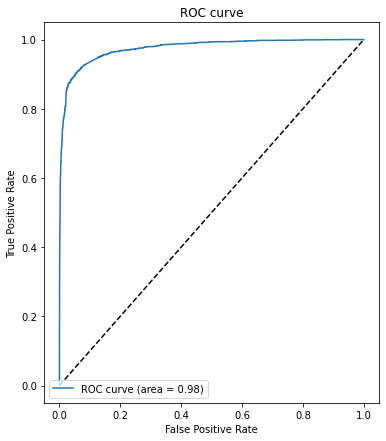

In [138]:
#Applying the function on our data to draw the ROC curve
fpr, tpr, thresh = metrics.roc_curve( ytrain_pred_final.actual, ytrain_pred_final['probability of buying'], drop_intermediate = False )

ROC_curve(ytrain_pred_final.actual,  ytrain_pred_final['probability of buying'])

**By the looks of it, the model is looking good as per the above ROC curve**

In [ ]:
# Finding optimal cutoff probability
optimal_prob_df = pd.DataFrame( columns = ['probs','accuracy','sensitivity','specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    conf_mat = metrics.confusion_matrix(ytrain_pred_final.actual, ytrain_pred_final[i] )
    total_sc=sum(sum(cm1))
    accuracy = (conf_mat[0,0]+conf_mat[1,1])/total_sc
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    
    optimal_prob_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(optimal_prob_df)

In [ ]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    print(ytrain_pred_final[i])

### Predicting on the test set

In [144]:
xtest.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What matters most to you in choosing a course_Better Career Prospects',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Missing',
       'What matters most to you in choosing a course_Other',
       'Update me on Supply Chain Content_No', 'Newspaper_No', 'Newspaper_Yes',
       ...
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=186)

In [145]:
xtest.shape

(2269, 186)

In [146]:
#Applying the scaler on the test data
xtest[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.transform(xtest[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
xtest.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Update me on Supply Chain Content_No,Newspaper_No,Newspaper_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,X Education Forums_No,X Education Forums_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Search_No,Search_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Get updates on DM Content_No,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Call_No,Do Not Call_Yes,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Through Recommendations_No,Through Recommendations_Yes,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Magazine_No,Receive More Updates About Our Courses_No,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recogniti

In [147]:
#selecting the same variables we did for training the model
xtest_new= xtest[xtrain4.columns]
xtest_new.shape

(2269, 17)

In [149]:
xtest_sm= sm.add_constant(xtest_new)
ytest_pred= log4.predict(xtest_sm)
ytest_pred

3271    0.085632
1490    0.995116
7936    0.073206
4216    0.985474
3830    0.086763
          ...   
7748    0.010716
5538    0.877928
1232    0.043587
1457    0.007662
1506    0.987696
Length: 2269, dtype: float64

In [150]:
ytest

3271    0
1490    1
7936    0
4216    1
3830    0
       ..
7748    0
5538    0
1232    0
1457    0
1506    1
Name: Converted, Length: 2269, dtype: int64

In [161]:
#creating a dataframe with the actual train set values and predictions together along with the probability of buying the course
ytest_pred_final= pd.DataFrame({'actual':ytest, 'probability of buying': ytest_pred})
ytest_pred_final['Prediction']= ytest_pred_final['probability of buying'].map(lambda x: 1 if x>0.5 else 0)  #is probability of buying is greater than 0.5 i.e. 50% then we predict 1 else 0
ytest_pred_final['Prospect ID']= xtest0['Prospect ID']
ytest_pred_final.head()

,actual,probability of buying,Prediction,Prospect ID
3271,0,0.085632,0,afc71cc4-67a4-42ae-89f7-779d20c5810d
1490,1,0.995116,1,a8b4e742-2cce-4280-8549-a4a7d51a0fe2
7936,0,0.073206,0,774a3b07-491d-4311-ad51-b25cc8cc59ec
4216,1,0.985474,1,16b63196-0da9-4b2d-974d-21d8f625f5ef
3830,0,0.086763,0,cbd89429-18cd-47b1-9699-21987bd70a8e


In [158]:
xtest0.shape

(2269, 187)

In [159]:
ytest_pred_final.shape

(2269, 3)

## Model Evaluation on test set

In [168]:
#Confusion matrix on test set

conf_matrix_test= metrics.confusion_matrix(ytest_pred_final.actual, ytest_pred_final.Prediction)
print(conf_matrix_test)

[[1370   71]
 [ 116  712]]


In [169]:
#Accuracy on test set
print(metrics.accuracy_score(ytest_pred_final.actual, ytest_pred_final.Prediction))

0.9175848391361834


**So we are getting an accuracy of 91.75 % on the test set which looks pretty good**

### Sensitivity and Specificity on test set

In [173]:
TP_test = conf_matrix_test[1,1] # true positive 
TN_test = conf_matrix_test[0,0] # true negatives
FP_test = conf_matrix_test[0,1] # false positives
FN_test = conf_matrix_test[1,0] # false negatives

In [174]:
#Sensitivity or Recall
TP_test / float(TP_test+FN_test)

0.8599033816425121

**So we are getting a sensitivity/recall of around 85.99% or 86% on the test set**

In [175]:
#specificity
TN_test / float(TN_test+FP_test)

0.9507286606523248

**So we are getting a specificity of around 95.07% on the test set**

In [177]:
#Precision
TP_test/float(TP_test+FP_test)

0.909323116219668

**So we are getting a precision of around 90.93% or 91% on the test set**

## Generating the Score variable

For generating the score variable we just need to multiply the probability of buying with 100.

So we will generate the score variable for all our leads i.e. all Prospect IDs (for both train and test set predictions to give scores to all)

In [180]:
#Giving scores to leads in train set
ytrain_pred_final['Score']= ytrain_pred_final['probability of buying'].map(lambda x: x*100)
ytrain_pred_final['Score']= round(ytrain_pred_final['Score'], 2)
ytrain_pred_final.head()

,actual,probability of buying,Prediction,Prospect ID,Score
5885,0,0.045051,0,8051c7c4-9cb5-43da-ab91-e721102ce3c0,4.51
8505,1,0.999583,1,b486ea9d-3474-4785-9179-4e6b6690563f,99.96
894,0,0.068090,0,88a022f6-5541-44a5-bd24-93704ed19295,6.81
6437,0,0.008186,0,47620cf4-ca86-49b0-9a17-bf8c89c4155f,0.82
2988,1,0.866976,1,d6ed6ebf-f261-46c3-abeb-8c78d828ba1b,86.70


In [181]:
#Giving scores to leads in test set
ytest_pred_final['Score']= ytest_pred_final['probability of buying'].map(lambda x: x*100)
ytest_pred_final['Score']= round(ytest_pred_final['Score'], 2)
ytest_pred_final.head()

,actual,probability of buying,Prediction,Prospect ID,Score
3271,0,0.085632,0,afc71cc4-67a4-42ae-89f7-779d20c5810d,8.56
1490,1,0.995116,1,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,99.51
7936,0,0.073206,0,774a3b07-491d-4311-ad51-b25cc8cc59ec,7.32
4216,1,0.985474,1,16b63196-0da9-4b2d-974d-21d8f625f5ef,98.55
3830,0,0.086763,0,cbd89429-18cd-47b1-9699-21987bd70a8e,8.68
